# Analysis of Consumer Complaint Data from CFPB by Ninh Nguyen

LINK: https://catalog.data.gov/dataset/consumer-complaint-database

FILE DESCRIPTION: The Consumer Complaint Database is a collection of complaints about consumer financial products and services that CFPB sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily. 

Data Variables:

Date received 	
Product 	
Sub-product 	
Issue 	
Sub-issue 	
Consumer complaint narrative 	
Company public response 	
Company 	
State 	
ZIP code 	
Tags 	
Consumer consent provided? 	
Submitted via 	
Date sent to company 	
Company response to consumer 	
Timely response? 	
Consumer disputed? 	
Complaint ID


In [30]:
# imported 2 python modules

import pandas as pd
import seaborn as sns

In [31]:
# Read the file

complaint = pd.read_csv('complaints.csv', low_memory = False)
complaint

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-07,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I discovered that some of the information on m...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10469,NaN,Consent provided,Web,2022-11-07,Closed with non-monetary relief,Yes,NaN,6170112
1,2022-12-20,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,NaN,NaN,"Early Warning Services, LLC",IL,61107,NaN,NaN,Web,2022-12-20,Closed with explanation,Yes,NaN,6342336
2,2022-12-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,SC,29627,Servicemember,NaN,Web,2022-12-17,In progress,Yes,NaN,6332970
3,2022-12-17,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,WI,53218,NaN,Consent not provided,Web,2022-12-17,Closed with non-monetary relief,Yes,NaN,6331892
4,2022-12-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,AZ,85323,NaN,NaN,Web,2022-12-16,In progress,Yes,NaN,6323002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3186946,2017-02-09,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt resulted from identity theft,I have disputed my debts several times with no...,NaN,Bonneville Billing and Collections,UT,84054,Servicemember,Consent provided,Web,2017-02-09,Closed with explanation,Yes,No,2334969
3186947,2015-04-29,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,My father died in XX/XX/XXXX. Left me his only...,NaN,"CITIBANK, N.A.",OK,74066,NaN,Consent provided,Web,2015-04-29,Closed with explanation,Yes,No,1352738
3186948,2017-03-31,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,cfbp i would Like to file a complaint on Exper...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MN,55379,NaN,Consent provided,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,2412926
3186949,2017-01-16,Credit reporting,NaN,Incorrect information on credit report,Account status,My husband and I are in the middle of an FHA S...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30215,NaN,Consent provided,Web,2017-01-16,Closed with explanation,Yes,No,2292586


In [32]:
# total number of observations, variables

complaint.shape

(3186951, 18)

In [33]:
# data type of variables

complaint.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [34]:
complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186951 entries, 0 to 3186950
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 437.

In [35]:
# Read the first 5 rows of the file

complaint.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-11-07,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I discovered that some of the information on m...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10469,NaN,Consent provided,Web,2022-11-07,Closed with non-monetary relief,Yes,NaN,6170112
1,2022-12-20,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,NaN,NaN,"Early Warning Services, LLC",IL,61107,NaN,NaN,Web,2022-12-20,Closed with explanation,Yes,NaN,6342336
2,2022-12-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,SC,29627,Servicemember,NaN,Web,2022-12-17,In progress,Yes,NaN,6332970
3,2022-12-17,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,WI,53218,NaN,Consent not provided,Web,2022-12-17,Closed with non-monetary relief,Yes,NaN,6331892
4,2022-12-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,AZ,85323,NaN,NaN,Web,2022-12-16,In progress,Yes,NaN,6323002


In [36]:
# Most complaints made was on December 7th, 2022

complaint['Date received'].describe()

count        3186951
unique          4043
top       2022-12-07
freq            3857
Name: Date received, dtype: object

In [37]:
# The top issue was "Incorrect information on your report".

complaint['Issue'].describe()

count                                  3186951
unique                                     165
top       Incorrect information on your report
freq                                    783522
Name: Issue, dtype: object

In [38]:
# The top offender is Equifax.

complaint['Company'].describe()

count           3186951
unique             6598
top       EQUIFAX, INC.
freq             553251
Name: Company, dtype: object

In [39]:
# The top 5 offenders are Equifax, Transunion, Experian, Bank of America, and Wells Fargo.

complaint['Company'].value_counts()

EQUIFAX, INC.                             553251
TRANSUNION INTERMEDIATE HOLDINGS, INC.    458400
Experian Information Solutions Inc.       428867
BANK OF AMERICA, NATIONAL ASSOCIATION     121103
WELLS FARGO & COMPANY                     102267
                                           ...  
COUNTRY CLUB MORTGAGE, INC.                    1
Applewood Funding Corporation                  1
Jonsue, LLC                                    1
Schiller & Adam, P.A.                          1
BAY VALLEY                                     1
Name: Company, Length: 6598, dtype: int64

In [40]:
# Most complaints are in California [CA].

complaint['State'].value_counts()

CA    387362
FL    357269
TX    311456
NY    208061
GA    202256
       ...  
AA        50
MP        45
AS        38
MH        33
PW        13
Name: State, Length: 63, dtype: int64

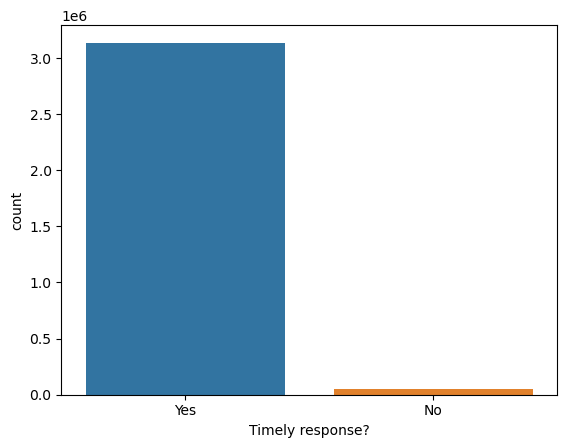

In [41]:
# Most companies respond to CFPB reports of a consumer complaint.

response = sns.countplot(x = 'Timely response?', data = complaint)